In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('../artifacts/raw/data.csv')
data.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [ ]:
"""
--------DATA DICTIONARY----------------------

step: represents a unit of time where 1 step equals 1 hour
type: type of online transaction
amount: the amount of the transaction
nameOrig: customer starting the transaction
oldbalanceOrg: balance before the transaction
newbalanceOrig: balance after the transaction
nameDest: recipient of the transaction
oldbalanceDest: initial balance of recipient before the transaction
newbalanceDest: the new balance of recipient after the transaction
isFraud: fraud transaction


"""

In [3]:
data.shape

(6362620, 11)

In [4]:
data.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [5]:
data.duplicated().sum()

0

In [6]:
data.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


In [7]:
data['isFraud'].value_counts() # class is imbalanced

isFraud
0    6354407
1       8213
Name: count, dtype: int64

#### Data Exploration

In [8]:
data.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud'],
      dtype='object')

In [9]:
data.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [10]:
cat_cols = ['type']
num_cols = ['step', 'amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'isFraud', 'isFlaggedFraud']

In [11]:
def num_plot_dist(df, num_features):
    fig, axes = plt.subplots(len(num_features), 2, figsize=(15, len(num_features)*5))
    if len(num_features) == 1:
        axes = [axes]
    for i, column in enumerate(num_features):
        sns.histplot(data=df, x=column, ax=axes[i][0], kde=True, palette="Blues")
        axes[i][0].set_title(f'Histogram for {column}') # histogram for the columns

        sns.boxplot(data=df, x=column, ax=axes[i][1], palette="Blues")
        axes[i][1].set_title(f'Box plot for {column}')

    plt.tight_layout()
    plt.show()

/var/folders/vh/9jy5nq5n6wl5cjp9y3m5l07w0000gn/T/ipykernel_45010/2986630773.py:6: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data=df, x=column, ax=axes[i][0], kde=True, palette="Blues")
/var/folders/vh/9jy5nq5n6wl5cjp9y3m5l07w0000gn/T/ipykernel_45010/2986630773.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=column, ax=axes[i][1], palette="Blues")
/var/folders/vh/9jy5nq5n6wl5cjp9y3m5l07w0000gn/T/ipykernel_45010/2986630773.py:6: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data=df, x=column, ax=axes[i][0], kde=True, palette="Blues")
/var/folders/vh/9jy5nq5n6wl5cjp9y3m5l07w0000gn/T/ipykernel_45010/2986630773.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y

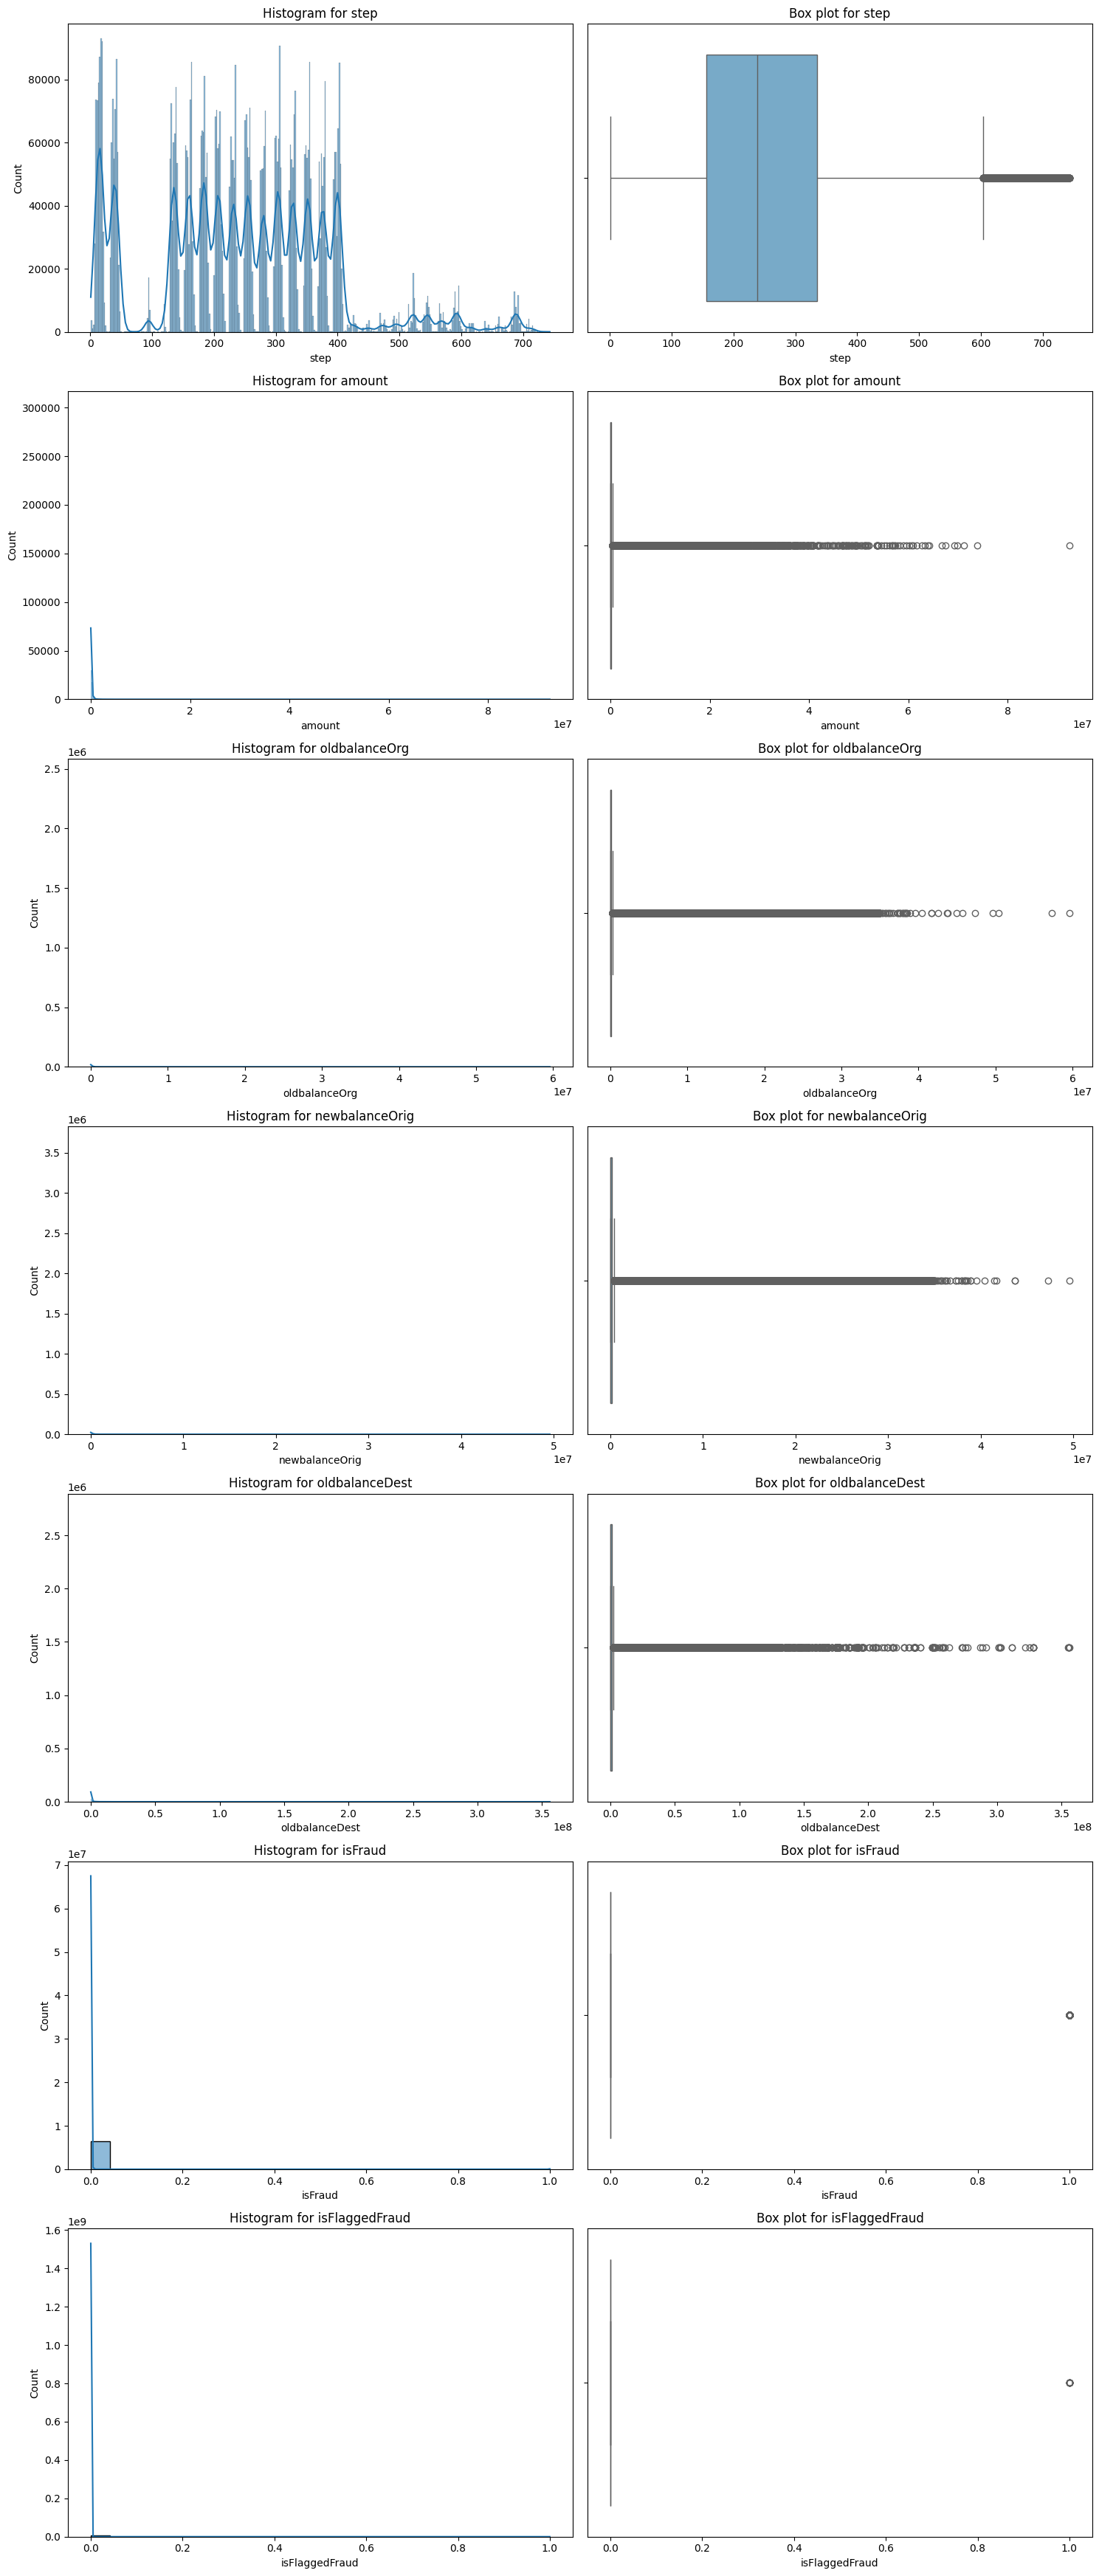

In [12]:
num_plot_dist(data, num_cols)

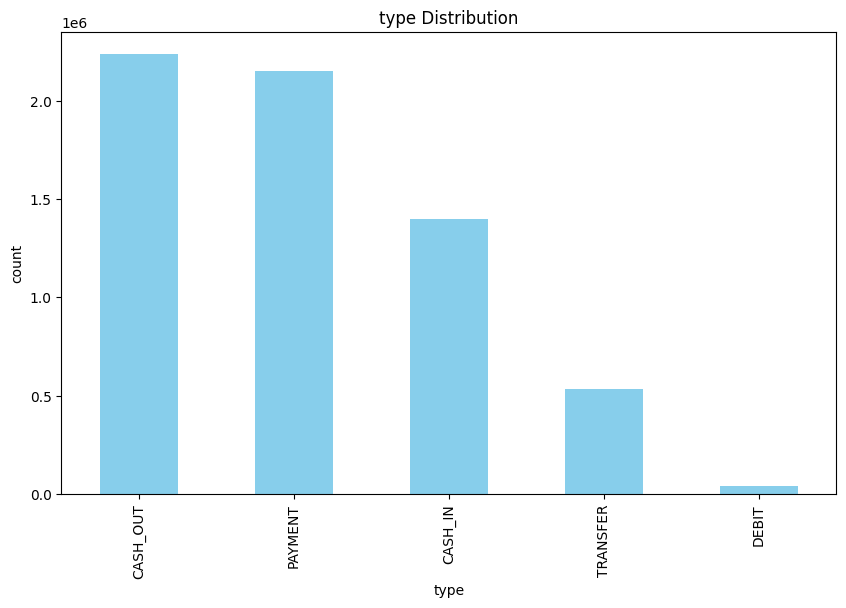

In [13]:
for cat_feature in cat_cols:
    plt.figure(figsize=(10,6))
    data[cat_feature].value_counts().plot(kind='bar', color='skyblue')
    plt.title(f'{cat_feature} Distribution')
    plt.xlabel(cat_feature)
    plt.ylabel('count')
    plt.show()

In [14]:
def plot_bivariate_num(df, target, num_features):
    num_plots = len(num_features)
    num_rows = (num_plots+1)//2

    fig, axes = plt.subplots(num_rows, 2, figsize=(15,num_rows*5))
    axes = axes.flatten()

    for i, column in enumerate(num_features):
        sns.boxplot(x=target, y=column, ax=axes[i], data=df, palette="Blues")
        axes[i].set_title(f"{column} VS {target}")

    
    plt.tight_layout()
    plt.show()

/var/folders/vh/9jy5nq5n6wl5cjp9y3m5l07w0000gn/T/ipykernel_62165/2406934255.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=target, y=column, ax=axes[i], data=df, palette="Blues")
/var/folders/vh/9jy5nq5n6wl5cjp9y3m5l07w0000gn/T/ipykernel_62165/2406934255.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=target, y=column, ax=axes[i], data=df, palette="Blues")
/var/folders/vh/9jy5nq5n6wl5cjp9y3m5l07w0000gn/T/ipykernel_62165/2406934255.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=target, y=column, ax=axes[i], data=df, palett

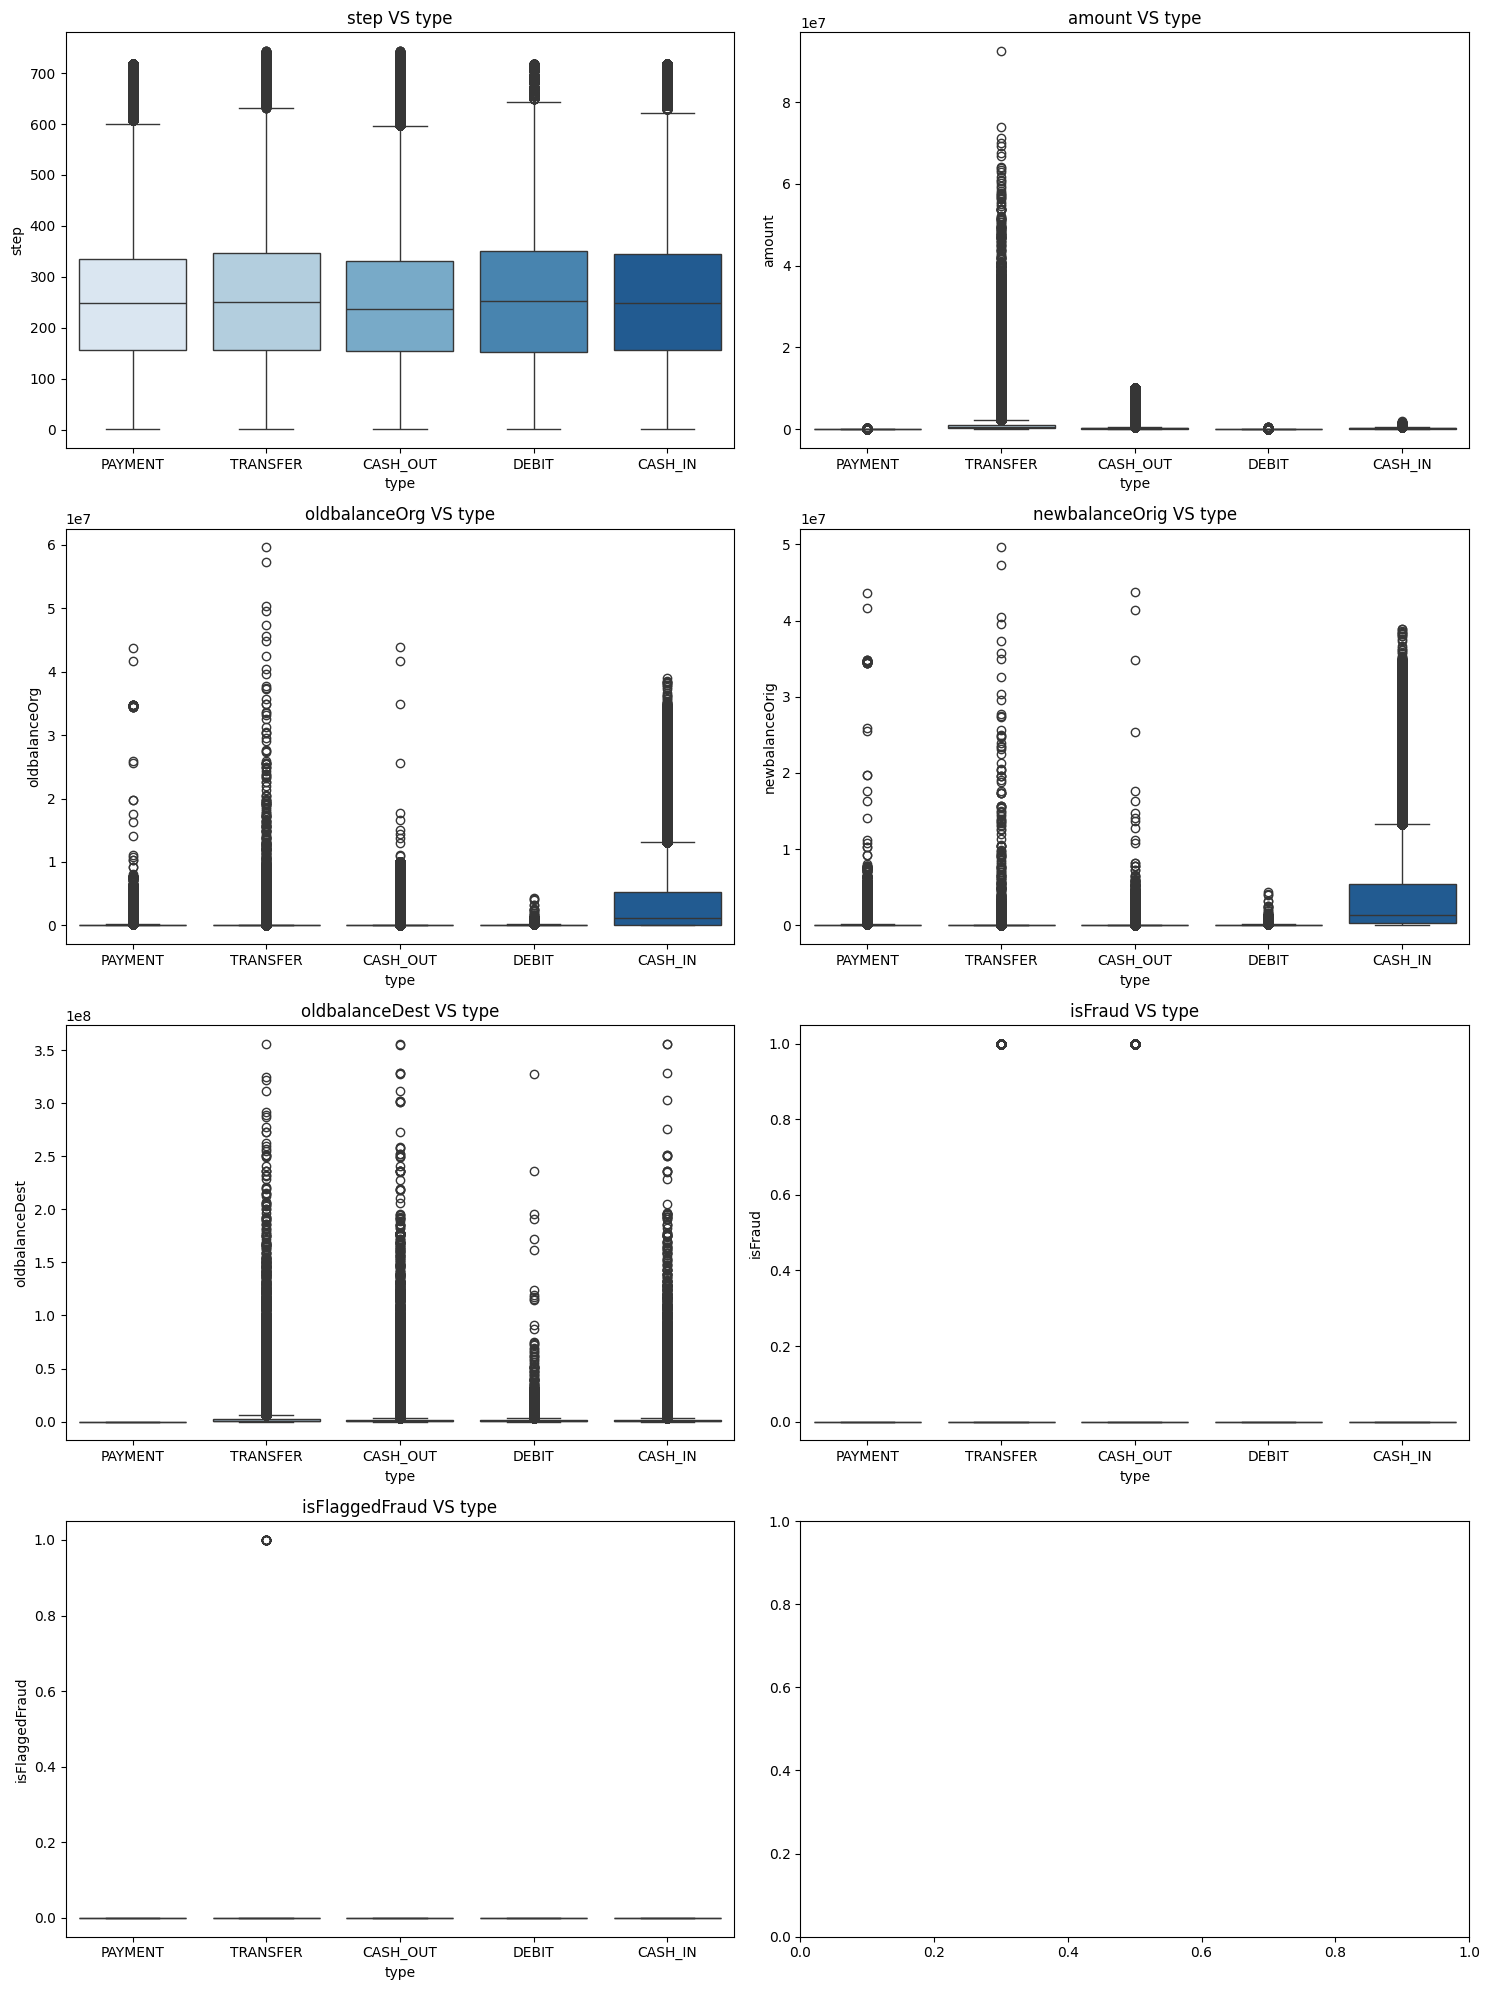

In [15]:
plot_bivariate_num(data, 'type', num_cols)

In [16]:
def plot_bivariate_cat(df, target, cat_features):
    num_features = len(cat_features)
    num_rows = (num_features+1)//2

    fig, axes = plt.subplots(num_rows, 2, figsize=(15,num_rows*5))
    axes = axes.flatten()

    for i, feature in enumerate(cat_features):
        sns.countplot(x=feature, hue=target, data=df, palette="Set2", ax=axes[i])
        axes[i].set_title(f"{feature} VS {target}")
        axes[i].tick_params(axis='x', rotation=90)

    plt.tight_layout()
    plt.show()

#### Data Preprocessing

In [17]:
data.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [18]:
#### Label Encoder
from sklearn.preprocessing import LabelEncoder

In [19]:
le = LabelEncoder()

mappings = {}

for col in cat_cols:
    data[col] = le.fit_transform(data[col])

    mappings[col] = {label:code for label, code in zip(le.classes_, le.transform(le.classes_))}

In [20]:
mappings

{'type': {'CASH_IN': 0,
  'CASH_OUT': 1,
  'DEBIT': 2,
  'PAYMENT': 3,
  'TRANSFER': 4}}

#### Check for MultiCollinearity
When two or more features in your dataset are highly correlated
VIF > 5; indicates multicollinearity

In [21]:
data.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,3,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,3,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,4,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,1,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,3,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [22]:
data.drop(columns=['nameOrig', 'nameDest'], inplace=True)

In [23]:
data.head()

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,3,9839.64,170136.0,160296.36,0.0,0.0,0,0
1,1,3,1864.28,21249.0,19384.72,0.0,0.0,0,0
2,1,4,181.00,181.0,0.00,0.0,0.0,1,0
3,1,1,181.00,181.0,0.00,21182.0,0.0,1,0
4,1,3,11668.14,41554.0,29885.86,0.0,0.0,0,0


In [24]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

In [25]:
X = add_constant(data)

vif_data = pd.DataFrame()

vif_data['feature'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values,i) for i in range(X.shape[1])]

In [26]:
vif_data

,feature,VIF
0,const,6.621324
1,step,1.003219
2,type,1.277789
3,amount,3.773553
4,oldbalanceOrg,540.687682
5,newbalanceOrig,546.716981
6,oldbalanceDest,66.827640
7,newbalanceDest,76.839915
8,isFraud,1.195822
9,isFlaggedFraud,1.002638


In [27]:
corr = data.corr()

<Axes: >

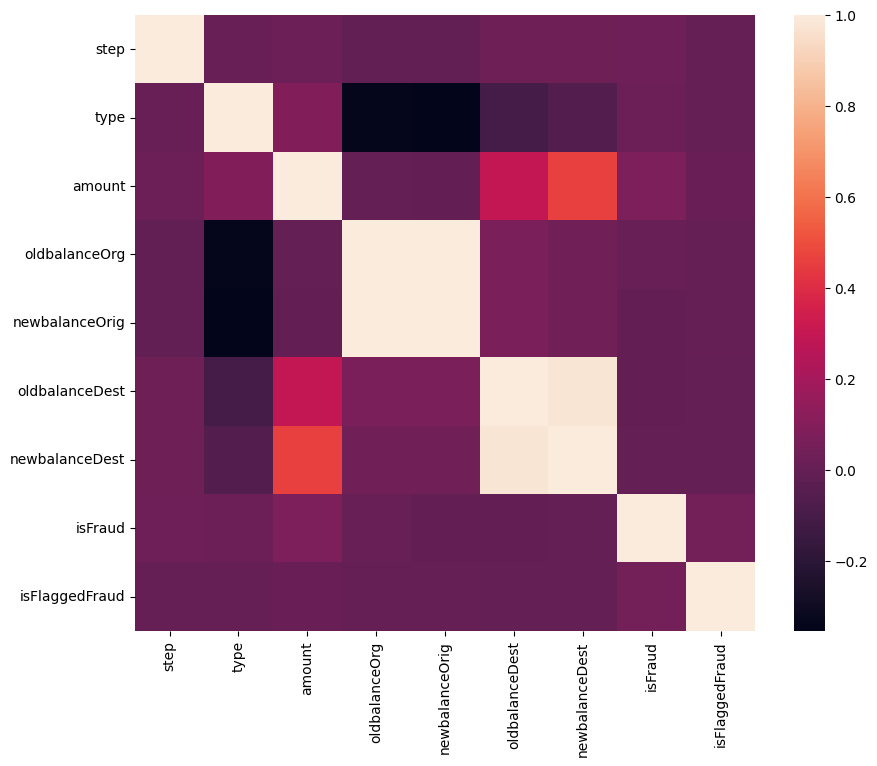

In [28]:
plt.figure(figsize=(10,8))
sns.heatmap(corr)

In [29]:
# check for skewness
skewness = data.skew()

In [30]:
skewness

step                0.375177
type                0.196530
amount             30.993949
oldbalanceOrg       5.249136
newbalanceOrig      5.176884
oldbalanceDest     19.921758
newbalanceDest     19.352302
isFraud            27.779538
isFlaggedFraud    630.603629
dtype: float64

In [31]:
X = data.drop(columns=['isFraud', 'isFlaggedFraud'])
y = data['isFraud']

In [32]:
X

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest
0,1,3,9839.64,170136.00,160296.36,0.00,0.00
1,1,3,1864.28,21249.00,19384.72,0.00,0.00
2,1,4,181.00,181.00,0.00,0.00,0.00
3,1,1,181.00,181.00,0.00,21182.00,0.00
4,1,3,11668.14,41554.00,29885.86,0.00,0.00
...,...,...,...,...,...,...,...
6362615,743,1,339682.13,339682.13,0.00,0.00,339682.13
6362616,743,4,6311409.28,6311409.28,0.00,0.00,0.00
6362617,743,1,6311409.28,6311409.28,0.00,68488.84,6379898.11
6362618,743,4,850002.52,850002.52,0.00,0.00,0.00


In [33]:
y

0          0
1          0
2          1
3          1
4          0
          ..
6362615    1
6362616    1
6362617    1
6362618    1
6362619    1
Name: isFraud, Length: 6362620, dtype: int64

In [34]:
from imblearn.over_sampling import SMOTE

In [35]:
smote = SMOTE(random_state=42)

X_res, y_res = smote.fit_resample(X,y)

In [36]:
y_res.value_counts()

isFraud
0    6354407
1    6354407
Name: count, dtype: int64

In [38]:
balanced_data = pd.DataFrame(X_res, columns=X.columns)
balanced_data['isFraud'] = y_res

In [39]:
balanced_data.head()

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
0,1,3,9839.64,170136.0,160296.36,0.0,0.0,0
1,1,3,1864.28,21249.0,19384.72,0.0,0.0,0
2,1,4,181.00,181.0,0.00,0.0,0.0,1
3,1,1,181.00,181.0,0.00,21182.0,0.0,1
4,1,3,11668.14,41554.0,29885.86,0.0,0.0,0


In [40]:
balanced_data.shape

(12708814, 8)

#### Feature Importance

In [41]:
from sklearn.ensemble import RandomForestClassifier

In [42]:
model = RandomForestClassifier(random_state=42)
model.fit(X, y)

RandomForestClassifier(random_state=42)

In [43]:
feature_importance = model.feature_importances_

In [44]:
feature_importance_df = pd.DataFrame({
    'feature': X.columns,
    'importance': feature_importance
})

In [46]:
top_features = feature_importance_df.sort_values(by='importance', ascending=False)

In [47]:
top_features

,feature,importance
6,newbalanceDest,0.319875
3,oldbalanceOrg,0.258734
2,amount,0.166911
0,step,0.097649
5,oldbalanceDest,0.067725
1,type,0.061548
4,newbalanceOrig,0.027559


In [49]:
top_5_features = top_features['feature'].head(5).values

In [50]:
top_5_features

array(['newbalanceDest', 'oldbalanceOrg', 'amount', 'step',
       'oldbalanceDest'], dtype=object)

In [51]:
top_features_data = data[top_5_features.tolist() + ['isFraud']]

In [52]:
top_features_data.head()

,newbalanceDest,oldbalanceOrg,amount,step,oldbalanceDest,isFraud
0,0.0,170136.0,9839.64,1,0.0,0
1,0.0,21249.0,1864.28,1,0.0,0
2,0.0,181.0,181.00,1,0.0,1
3,0.0,181.0,181.00,1,21182.0,1
4,0.0,41554.0,11668.14,1,0.0,0


In [53]:
processed_data = top_features_data.copy()

In [55]:
processed_data.head()

,newbalanceDest,oldbalanceOrg,amount,step,oldbalanceDest,isFraud
0,0.0,170136.0,9839.64,1,0.0,0
1,0.0,21249.0,1864.28,1,0.0,0
2,0.0,181.0,181.00,1,0.0,1
3,0.0,181.0,181.00,1,21182.0,1
4,0.0,41554.0,11668.14,1,0.0,0


#### Model Selection

In [54]:
## Import LIBRARIES
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score, recall_score, f1_score, precision_score

In [56]:
X = processed_data.drop(columns='isFraud')
y = processed_data['isFraud']

In [57]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=32)

In [58]:
classifiers = {
    'RandomForest' : RandomForestClassifier(random_state=32),
    'LogisticRegression' : LogisticRegression(random_state=32), 
    'GradientBoosting' : GradientBoostingClassifier(random_state=32),
    'SupportVectorClassifier' : SVC(random_state=32),
    'DecisionTree' : DecisionTreeClassifier(random_state=32),
    'KNN' : KNeighborsClassifier(),
    "NaiveBayes" : GaussianNB(), 
    'XGBoost' : XGBClassifier(random_state=32),
    'Adaboost' : AdaBoostClassifier(random_state=32),
    'LGBM': LGBMClassifier(random_state=32)
}

In [59]:
metrics = {
    'Model' : [],
    'Accuracy' : [],
    'Precision' : [],
    'Recall' : [],
    'F1_Score' : []
}